<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/Fixed_vs_Dynamic_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [26]:
x = np.linspace(-2, 2, 2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

G.D. Using a fixed learning rate

In [27]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training
modelparamsFixed = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate
  # update parameter according to g.d.
  localmin = localmin - lr*grad

  modelparamsFixed[i, 0] = localmin
  modelparamsFixed[i, 1] = grad
  modelparamsFixed[i, 2] = lr

<ipython-input-27-8625406593ee>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i, 0] = localmin
<ipython-input-27-8625406593ee>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i, 1] = grad


G.D. using gradient based learning rate

In [28]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

<ipython-input-28-4db6c0c6a714>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
<ipython-input-28-4db6c0c6a714>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
<ipython-input-28-4db6c0c6a714>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


G.D. using a time based learning rate

In [29]:
# redefine parameters
learning_rate = 0.1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate * (1 - (i + 1) / training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i, 0] = localmin
  modelparamsTime[i, 1] = grad
  modelparamsTime[i, 2] = lr

<ipython-input-29-3a39daf538c0>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i, 0] = localmin
<ipython-input-29-3a39daf538c0>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i, 1] = grad


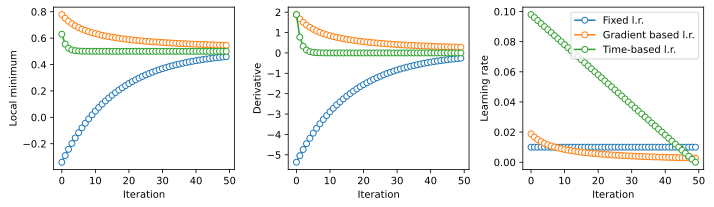

In [30]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i], 'o-', markerfacecolor = 'w')
  ax[i].plot(modelparamsGrad[:,i], 'o-', markerfacecolor = 'w')
  ax[i].plot(modelparamsTime[:,i], 'o-', markerfacecolor = 'w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.', 'Gradient based l.r.', 'Time-based l.r.'])

plt.tight_layout()
plt.show()